In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


from sklearn.cluster import DBSCAN


In [3]:
# The dataset is already preprocessed...
dataset = pickle.load(open("../datasets/part3_dataset.data", "rb"))


In [4]:
def visualize_pca(dataset: np.ndarray, title: str) -> None:
    pca = PCA(2)
    pca.fit(dataset)
    transformed_data = pca.transform(dataset)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.show()

def visualize_tsne(dataset: np.ndarray, title: str, n_components=2, perplexity=30) -> None:
    tsne = TSNE(n_components=n_components, perplexity=perplexity)
    transformed_data = tsne.fit_transform(dataset)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.show()

def visualize_umap(dataset: np.ndarray, title: str, n_components=2, min_dist=0.018, n_neighbours=2, metric='cosine') -> None:
    umap = UMAP(n_components=n_components, min_dist=min_dist, n_neighbors=n_neighbours, metric=metric)
    transformed_data = umap.fit_transform(dataset)
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.show()

(2004, 2)

/var/folders/__/hjynx0jj73v627v_ydsgttrc0000gn/T/ipykernel_67363/240788359.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


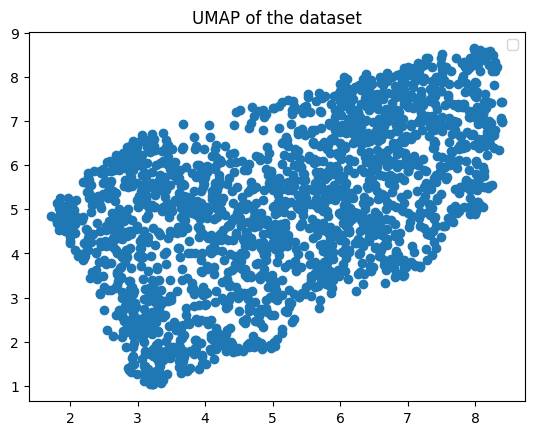

In [ ]:
umap = UMAP()
transformed_data = umap.fit_transform(dataset)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.legend()

plt.title("UMAP of the dataset")
plt.show()

eps: 1e-05, min_samples: 20, score: -0.14693233370780945
eps: 1e-05, min_samples: 22, score: -0.1611315906047821
eps: 1e-05, min_samples: 25, score: -0.20296594500541687
eps: 1e-05, min_samples: 27, score: -0.1390470415353775
eps: 1e-05, min_samples: 30, score: -0.1030161902308464
eps: 1e-05, min_samples: 32, score: -0.10275549441576004
eps: 1e-05, min_samples: 35, score: -0.10358335822820663
eps: 1e-05, min_samples: 40, score: -0.11001920700073242
eps: 1.0526315789473684e-05, min_samples: 20, score: -0.14701490104198456
eps: 1.0526315789473684e-05, min_samples: 22, score: -0.16099536418914795
eps: 1.0526315789473684e-05, min_samples: 25, score: -0.19977469742298126
eps: 1.0526315789473684e-05, min_samples: 27, score: -0.12441032379865646
eps: 1.0526315789473684e-05, min_samples: 30, score: -0.09399306029081345
eps: 1.0526315789473684e-05, min_samples: 32, score: -0.09604058414697647
eps: 1.0526315789473684e-05, min_samples: 35, score: -0.09389742463827133
eps: 1.0526315789473684e-05, 

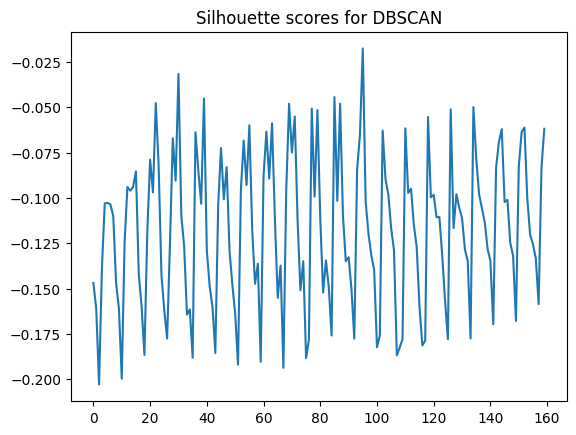

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.00001, 0.00002, 20)
min_samples_values = [20, 22, 25, 27, 30, 32, 35, 40]

silhouette_scores = []

best_score = -1
best_eps = None
best_min_samples = None


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbscan.fit_predict(transformed_data)
        if len(set(labels)) == 1:
            continue
        silhouette_scores.append(silhouette_score(transformed_data, labels))
        print(f"eps: {eps}, min_samples: {min_samples}, score: {silhouette_scores[-1]}")
        if silhouette_scores[-1] > best_score:
            best_score = silhouette_scores[-1]
            best_eps = eps
            best_min_samples = min_samples

print(f"Best silhouette score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

plt.plot(silhouette_scores)
plt.title("Silhouette scores for DBSCAN")
plt.show()




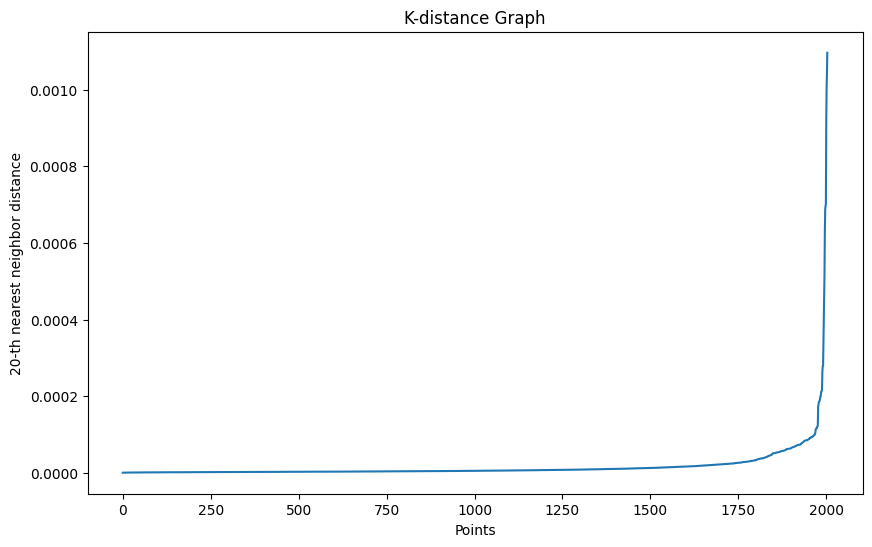

In [81]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k, metric='cosine',)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

plot_k_distance_graph(transformed_data, 20)


In [83]:
from sklearn.cluster import AgglomerativeClustering

for linkage_method in ['single', 'complete']:
    for distance_metric in ['euclidean', 'cosine']:
        for n_clusters in range(2, 6):
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=distance_metric)
            labels = agg.fit_predict(transformed_data)
            print(f"Linkage method: {linkage_method}, distance metric: {distance_metric}, n_clusters: {n_clusters}, silhouette score: {silhouette_score(transformed_data, labels)}")

Linkage method: single, distance metric: euclidean, n_clusters: 2, silhouette score: -0.00562950037419796
Linkage method: single, distance metric: euclidean, n_clusters: 3, silhouette score: -0.05844120681285858
Linkage method: single, distance metric: euclidean, n_clusters: 4, silhouette score: -0.28020331263542175
Linkage method: single, distance metric: euclidean, n_clusters: 5, silhouette score: -0.3904693126678467
Linkage method: single, distance metric: cosine, n_clusters: 2, silhouette score: 0.09711677581071854
Linkage method: single, distance metric: cosine, n_clusters: 3, silhouette score: 0.08584871888160706
Linkage method: single, distance metric: cosine, n_clusters: 4, silhouette score: 0.002710609696805477
Linkage method: single, distance metric: cosine, n_clusters: 5, silhouette score: -0.00786613393574953
Linkage method: complete, distance metric: euclidean, n_clusters: 2, silhouette score: 0.4475657343864441
Linkage method: complete, distance metric: euclidean, n_clust

In [89]:
km = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
labels = km.fit_predict(transformed_data)

/var/folders/__/hjynx0jj73v627v_ydsgttrc0000gn/T/ipykernel_67363/3669860195.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


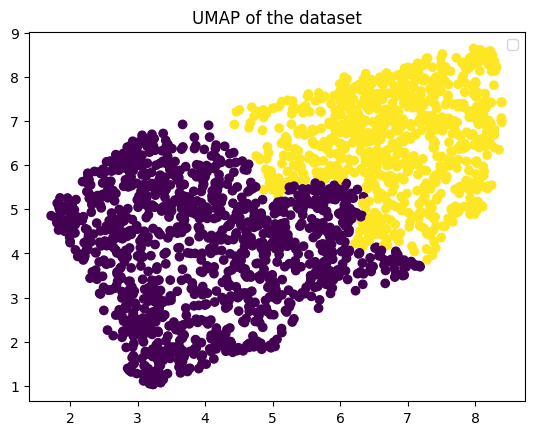

In [90]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.legend()

plt.title("UMAP of the dataset")
plt.show()

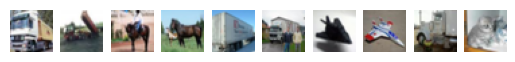

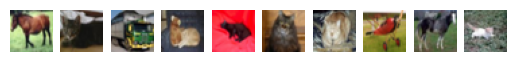

In [91]:
# show images and their cluster
for i in range(2):
    plt.figure()
    cluster = dataset[km.labels_ == i]
    for j in range(10):
        plt.subplot(1, 10, j+1)
        plt.imshow(cluster[j].reshape(32,32,3))
        plt.axis('off')
    plt.show()